# Aplicaciones de Mapper

En este notebook exploraremos algunas bases de datos y aplicaremos el algoritmo de Mapper para visualizarlas, esto con el fin de entender mejor como decidir que parámetros usar para el algoritmo.

En particular, estamos enfocados en entender cómo funciona la selección de nuestra proyección y que información podemos sacar a partir del grafo resultante.



In [1]:

import kmapper as km
from kmapper.jupyter import display
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## 1. Estudio de Calificaciones

La siguiente base de datos contiene la información de las calificiones de Matemáticas, Redacción y Lectura de algunos estudiantes de Estados Unidos en el 2015, de igual manera contiene información de nivel de estudios de los padres, raza, sexo, alimentación en la escuela. 

La base de datos se puede encontrar en el siguiente [link](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [5]:
performance_data=pd.read_csv('StudentsPerformance.csv')
performance_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Veamos la información básica de la base de datos de aquellos valores no categóricos.

In [8]:
performance_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Notemos que en los tres examenes, el promedio fue de 70 puntos, con una desviación estándar de 15 puntos (aproximadamente). Esta información la tomaremos en cuenta en el futuro.


Usualmente las calificaciones tienen una distribución normal, por lo que utilizaremos la cubierta en cuartiles para visualizar la información, por ejemplo si nuestros cuartiles tienen un traslape del 2%, entonces estos serían:

$$(0,26),(24,51),(49,76),(74,100).$$

Antes de decidir que vamos a estudiar, saquemos la información de los scores que tenemos.

In [9]:
data = performance_data[['math score','reading score','writing score']].to_numpy()

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

### 1.1. ¿Qué vamos a estudiar?

Supongamos que queremos conocer la relación que tiene el score de matemáticas con los otros dos (si este influye). Para esto, podemos utilizar mapper proyectando los datos en la variable que mide el score de matemáticas, esto es:

$$(math\,score,reading\,score,writing\,score)\mapsto math\,score.$$

Esta es una función de $\mathbb{R}^3\to\mathbb{R}.$ 

Como me interesa conocer que pasa con los otros dos scores, voy a utilizar su promedio para colorear los elementos del cluster.

In [60]:
mean_outer_score=(data[:,1]+data[:,2])/2.0

array([ 73. ,  89. ,  94. ,  50.5,  76.5,  80.5,  93.5,  41. ,  65.5,
        55. ,  53. ,  47.5,  77. ,  71. ,  55.5,  76.5,  87.5,  30. ,
        44. ,  59.5,  66. ,  72.5,  53.5,  73. ,  75.5,  73. ,  54.5,
        72. ,  67.5,  72.5,  74. ,  63. ,  68.5,  40. ,  84.5,  80. ,
        82. ,  61.5,  89. ,  56.5,  57.5,  70.5,  61.5,  65.5,  55. ,
        55.5,  63.5,  73.5,  75. ,  83. ,  51.5,  68.5,  43. ,  76.5,
        85.5,  42. ,  85.5,  52. ,  58.5,  13.5,  73. ,  36.5,  58. ,
        75.5,  58.5,  62.5,  37. ,  73. ,  57. ,  60.5,  68. ,  59. ,
        49.5,  56.5,  45. ,  39.5,  24. ,  79.5,  73. ,  68. ,  49.5,
        45. ,  50.5,  63.5,  36.5,  81. ,  85.5,  72.5,  68.5,  84. ,
        73. ,  35. ,  75. ,  47.5,  89. ,  81.5,  64. ,  71. ,  64.5,
        64.5,  67. ,  74. ,  90. ,  45.5,  88. ,  69.5, 100. ,  63.5,
        73. ,  68. ,  93.5,  52. ,  50. ,  56. , 100. ,  75.5,  83.5,
        80.5,  62. ,  67. ,  90.5,  90.5,  93. ,  56.5,  76.5,  90.5,
        67.5,  75.5,

In [61]:
mapper = km.KeplerMapper(verbose=1)
# La proyección sobre el math score, corresponde a proyectar sobre la primera columna de data
projected_data = mapper.fit_transform(data, projection=[0] ) # Math score


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [63]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

Cover(n_cubes=4, perc_overlap=0.2, limits=None, verbose=0)

In [64]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 4 hypercubes.


c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Created 12 edges and 16 nodes in 0:00:00.464734.


c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
G['meta_data']

{'projection': '[0]',
 'n_cubes': 4,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=4)',
 'scaler': 'MinMaxScaler()'}

In [66]:
mapper.visualize(G, 
                title='Performance Data based on Math Score and Mean of other two',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_outer_score,
                color_function_name = 'Mean of Reading and Writing Score',
                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("performance_math_score" + ".html")

Wrote visualization to: mapper_visualization_output.html


C:\Users\L03088338\AppData\Roaming\Python\Python310\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Vemos que nuestro grafo tiene 5 componentes conexas, de las cuales 3 son singletones. Vamos a explorar la información en estas tres.

![Graph Mapper](Mathvsothertwo.png)

El nodo amarillo grande, tiene como id `cube3_cluster1`.

In [69]:
print("Este nodo cuenta con:", len(G['nodes']['cube3_cluster1']), "estudiantes")

Este nodo cuenta con: 48 estudiantes


In [75]:
mvstwo_cube3c1=performance_data.iloc[G['nodes']['cube3_cluster1'],:]

Si graficamos el score de mathematics contra el promedio de los otros dos, obtenemos lo siguiente:

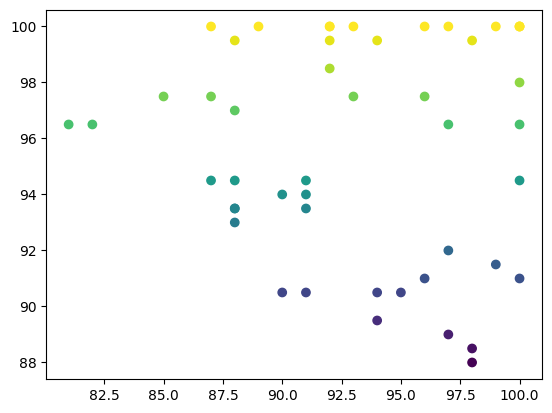

In [76]:
x=mvstwo_cube3c1['math score']
y=mean_outer_score[G['nodes']['cube3_cluster1']]
scatter=plt.scatter(x=x,y=y,c=y,cmap='viridis')

Si hubiera una correlación (matemática), esta gráfica debería verse como una recta de pendiente positiva. Lo cual no es el caso.

Tu puedes, comprobar esto con regresión lineal.

Vamos a investigar que sucede con el `cube3_cluster3`.

In [78]:
mvstwo_cube3c3=performance_data.iloc[G['nodes']['cube3_cluster3'],:]
mvstwo_cube3c3.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
13,male,group A,some college,standard,completed,78,72,70
51,male,group E,associate's degree,free/reduced,completed,77,69,68
83,male,group E,associate's degree,standard,none,72,64,63
100,male,group B,some college,standard,none,79,67,67


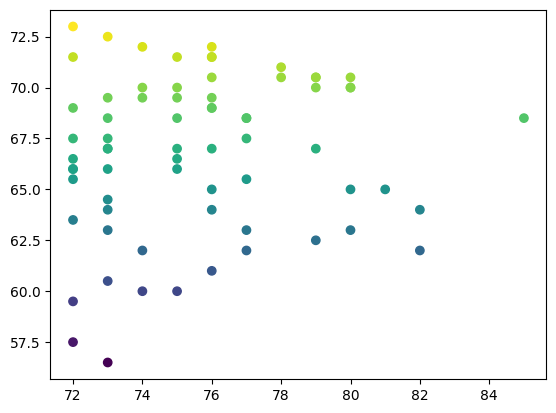

In [79]:
x=mvstwo_cube3c3['math score']
y=mean_outer_score[G['nodes']['cube3_cluster3']]
scatter=plt.scatter(x=x,y=y,c=y,cmap='viridis')

Con esto comprobamos que no hay correlación directa entre un buen score de matemáticas contra los otros dos.

¿Qué pasaría con la relación entre: `math score` y: <br/>
    1. `Gender` <br/>
    2. `Parental level of education` <br/>
    ?

Estudia si hay correlación para alguna de estas variables y el score de matemáticas.

#### 1.2 Cambiemos de proyección

Anteriormente obtuvimos información proyectando en la calificación de matemáticas, pero ¿qué pasará con nuestro grafo si proyectamos con el promedio de los scores?

In [80]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data, projection="mean" )

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: mean
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (1000, 3)

..Projecting data using: mean

..Scaling with: MinMaxScaler()



In [81]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (1000, 3) using lens shaped (1000, 1)

Creating 4 hypercubes.


c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Created 7 edges and 16 nodes in 0:00:00.574335.


c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Nos interesa saber si hay alguna relación entre el promedio de los scores y el tipo de almuerzo que tienen los estudiantes.

Dado que `lunch` es una variable categórica, vamos a crear un diccionario que nos permita asignarle un número a cada categoría.

In [85]:
lunch=performance_data['lunch'].unique()
lunch
dict_lunch={'standard':0,'free/reduced':1}
performance_data['lunch_int']=performance_data['lunch'].map(dict_lunch)

In [86]:
mapper.visualize(G, 
                title='Performance Data based on Mean Score',
                #custom_tooltips = performance_data['parental level of education'].to_numpy(),
                color_values = performance_data['lunch_int'].to_numpy(),
                color_function_name = 'Lunch type',
                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("performance_mean_score" + ".html")

Wrote visualization to: mapper_visualization_output.html


c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in longlong_scalars
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\L03088338\AppData\Local\Programs\Python\Python310\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in longlong_scalars
  perc = round((bar / sum_bucket_value) * 100.0, 1)


C:\Users\L03088338\AppData\Roaming\Python\Python310\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Obtendremos algo como:

![Graph Mapper](Meanvslunch.png)

Notemos que este grafo tiene 8 componentes conexas, de las cuales 6 son singletones. Vamos a explorar la información en algunas de estas.

In [87]:
meanvslunch_cube2c1=performance_data.iloc[G['nodes']['cube2_cluster1'],:]
meanvslunch_cube2c1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,lunch_int
8,male,group D,high school,free/reduced,completed,64,64,67,1
20,male,group D,high school,standard,none,66,69,63,0
21,female,group B,some college,free/reduced,completed,65,75,70,1
27,female,group C,bachelor's degree,standard,none,67,69,75,0
29,female,group D,master's degree,standard,none,62,70,75,0


¿Qué podemos decir de la relación entre el promedio de los scores y: <br/>
    1. `Test preparation` <br/>
    2. `Parental level of education` <br/>
    ?
    